# Analyzing Temporary Housing Situations

I'm curious to see how often people in temporary housing situations come back. Also, if they do come back, how much time does it take for this person to come back?

I might look into modeling this later

In [1]:
import pandas as pd
import numpy as np

In [2]:
enrollment = pd.read_csv("data/preprocessed/enrollment_temp_housing.csv", index_col=0)

In [3]:
enrollment.head()

,Personal ID,Project Entry ID,Client Age at Entry,Last Permanent Zip,Project Entry Date Updated,Destination,Entry Date,Exit Date,Project ID,Housing Status @ Project Start,...,Months Homeless This Time,Chronic Homeless,In Permanent Housing,Residential Move In Date,Domestic Violence Victim,DV When Occurred,DV Currently Fleeing,Super Project,UTC Entry Time,UTC Exit Time
199,173848,446669,48.0,93955,4/11/2016,Other (HUD),2015-03-26,2016-04-04,3207,Category 1 - Homeless (HUD),...,1,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1427353200,1.459753e+09
298,173982,174152,20.0,93933,3/27/2013,"Staying or living with family, permanent tenur...",2011-12-22,2012-10-05,2115,Category 1 - Homeless (HUD),...,NaN,No,NaN,NaN,Yes (HUD),NaN,NaN,Temporary Housing,1324540800,1.349420e+09
303,174002,494356,18.0,93940,3/29/2016,NaN,2016-03-14,NaN,2816,Category 1 - Homeless (HUD),...,NaN,No,No,NaN,No (HUD),NaN,NaN,Temporary Housing,1457938800,inf
306,174006,140788,39.0,93940,6/12/2015,"Rental by client, no ongoing housing subsidy (...",2011-09-12,2013-10-01,2118,Category 1 - Homeless (HUD),...,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1315810800,1.380611e+09
321,174091,319538,27.0,93905,3/2/2015,"Rental by client, no ongoing housing subsidy (...",2014-05-06,2015-02-16,2115,Category 1 - Homeless (HUD),...,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1399359600,1.424074e+09


## How many of these individuals come back?

In [4]:
personal_ids = enrollment["Personal ID"].tolist()

from collections import Counter

incidents = Counter()
for pid in personal_ids:
    incidents[pid] += 1

## Convert into a series
incidents = pd.Series(incidents)

# Simple Statistics

In [5]:
incidents.sort_values(ascending=False, inplace=True)

In [6]:
incidents.describe()

count    2208.000000
mean        1.048007
std         0.222144
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
dtype: float64

# Plotting this information

In [7]:
from matplotlib import pyplot as plt

<Container object of 2208 artists>

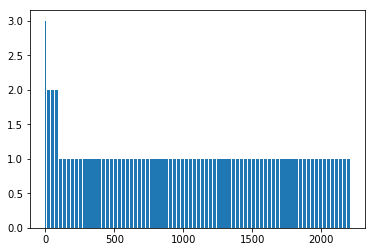

In [8]:
%matplotlib inline
# https://pythonspot.com/en/matplotlib-bar-chart/
plt.bar(np.arange(len(incidents)), incidents)

Yeah this graph is too confusing. Let's make a histogram instead.

In [9]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        ar

(array([ 2106.,    98.,     4.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 3 Patch objects>)

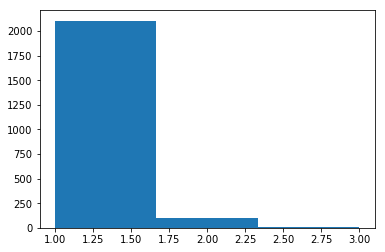

In [10]:
plt.hist(incidents.values, bins=3)

In [11]:
np.histogram(incidents.values, bins=3)[0]

array([2106,   98,    4])

It seems like the vast majority of these people actually leave a homelessness situation. So, it's hard to analyze what deficit any of these projects have.

# Plot temporary housing over time

I was asked by someone, "Have people been going into temporary housing situations more frequently these last few years?"

In [15]:
enrollment.head()

,Personal ID,Project Entry ID,Client Age at Entry,Last Permanent Zip,Project Entry Date Updated,Destination,Entry Date,Exit Date,Project ID,Housing Status @ Project Start,...,Months Homeless This Time,Chronic Homeless,In Permanent Housing,Residential Move In Date,Domestic Violence Victim,DV When Occurred,DV Currently Fleeing,Super Project,UTC Entry Time,UTC Exit Time
199,173848,446669,48.0,93955,4/11/2016,Other (HUD),2015-03-26,2016-04-04,3207,Category 1 - Homeless (HUD),...,1,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1427353200,1.459753e+09
298,173982,174152,20.0,93933,3/27/2013,"Staying or living with family, permanent tenur...",2011-12-22,2012-10-05,2115,Category 1 - Homeless (HUD),...,NaN,No,NaN,NaN,Yes (HUD),NaN,NaN,Temporary Housing,1324540800,1.349420e+09
303,174002,494356,18.0,93940,3/29/2016,NaN,2016-03-14,NaN,2816,Category 1 - Homeless (HUD),...,NaN,No,No,NaN,No (HUD),NaN,NaN,Temporary Housing,1457938800,inf
306,174006,140788,39.0,93940,6/12/2015,"Rental by client, no ongoing housing subsidy (...",2011-09-12,2013-10-01,2118,Category 1 - Homeless (HUD),...,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1315810800,1.380611e+09
321,174091,319538,27.0,93905,3/2/2015,"Rental by client, no ongoing housing subsidy (...",2014-05-06,2015-02-16,2115,Category 1 - Homeless (HUD),...,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1399359600,1.424074e+09


In [119]:
print enrollment["Entry Date"].min()
print enrollment["Entry Date"].max()

2009-06-16
2016-05-27


In [124]:
enrollment.head()

,Personal ID,Project Entry ID,Client Age at Entry,Last Permanent Zip,Project Entry Date Updated,Destination,Entry Date,Exit Date,Project ID,Housing Status @ Project Start,...,In Permanent Housing,Residential Move In Date,Domestic Violence Victim,DV When Occurred,DV Currently Fleeing,Super Project,UTC Entry Time,UTC Exit Time,_ones,Row Count
199,173848,446669,48.0,93955,4/11/2016,Other (HUD),2015-03-26,2016-04-04,3207,Category 1 - Homeless (HUD),...,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1427353200,1.459753e+09,1,1
298,173982,174152,20.0,93933,3/27/2013,"Staying or living with family, permanent tenur...",2011-12-22,2012-10-05,2115,Category 1 - Homeless (HUD),...,NaN,NaN,Yes (HUD),NaN,NaN,Temporary Housing,1324540800,1.349420e+09,1,1
303,174002,494356,18.0,93940,3/29/2016,NaN,2016-03-14,NaN,2816,Category 1 - Homeless (HUD),...,No,NaN,No (HUD),NaN,NaN,Temporary Housing,1457938800,inf,1,1
306,174006,140788,39.0,93940,6/12/2015,"Rental by client, no ongoing housing subsidy (...",2011-09-12,2013-10-01,2118,Category 1 - Homeless (HUD),...,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1315810800,1.380611e+09,1,1
321,174091,319538,27.0,93905,3/2/2015,"Rental by client, no ongoing housing subsidy (...",2014-05-06,2015-02-16,2115,Category 1 - Homeless (HUD),...,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN,Temporary Housing,1399359600,1.424074e+09,1,1


In [148]:
assert arrow.get(datetime.datetime(2015, 3, 26)).to("UTC").timestamp == 1427353200

AssertionError: 

In [152]:
(arrow.get(datetime.datetime(2015, 3, 26)).to("UTC").timestamp - 1427353200) / 3600

-7

In [107]:
enrollment["Row Count"] = 1

In [108]:
# Idea is that 
counts_over_time = enrollment.groupby("UTC Entry Time").count()["Row Count"]

In [109]:
assert counts_over_time.sum() == len(enrollment)

In [121]:
counts_over_time.head()

UTC Entry Time
1245135600    1
1266393600    6
1270710000    5
1285916400    2
1286521200    3
Name: Row Count, dtype: int64

In [122]:
min_time = arrow.get(datetime.datetime(2009, 6, 16)).timestamp

In [123]:
min_time

1245110400

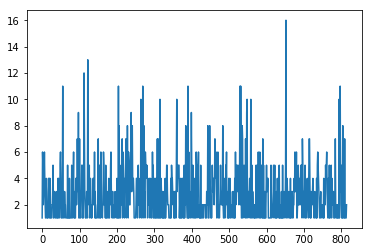

In [111]:
plt.plot(np.arange(len(counts_over_time)), counts_over_time)

So basically the graph doesn't look very conclusive. Maybe it'll be easier to see by quarter. (It also doesn't help that the axis isn't labeled by a semantic time.)

## Plot temporary housing over time by months

In [113]:
import datetime
import arrow

In [114]:
time_counts = pd.DataFrame(counts_over_time).reset_index()  # For easy filtering

In [160]:
datetimes = time_counts.apply(lambda row: arrow.get(row["UTC Entry Time"]).to("UTC"), axis=1)

In [161]:
time_counts["UTC Entry Time Datetime"] = datetimes

In [165]:
count_between_period(6, 7, 2009, 2009)

1

In [163]:
time_counts.head()

,UTC Entry Time,Row Count,UTC Entry Time Datetime
0,1245135600,1,2009-06-16T07:00:00+00:00
1,1266393600,6,2010-02-17T08:00:00+00:00
2,1270710000,5,2010-04-08T07:00:00+00:00
3,1285916400,2,2010-10-01T07:00:00+00:00
4,1286521200,3,2010-10-08T07:00:00+00:00


In [115]:
def count_between_period(month1, month2, year1, year2):
    """Counts temp housing between a month a year"""
    start = arrow.get(datetime.datetime(year1, month1, 1)).timestamp
    end = arrow.get(datetime.datetime(year2, month2, 1)).timestamp

    start_times_filter = np.array(time_counts["UTC Entry Time"] > start)
    end_times_filter = np.array(time_counts["UTC Entry Time"] <= end)

    time_filter = start_times_filter & end_times_filter
    return counts_over_time[time_filter].sum()

In [166]:
counts_in_months = list()
for year in xrange(2009, 2017):
    for month in xrange(1, 12):
        counts_in_months.append(count_between_period(month, month+1, year, year))
    # Corner case: December to January
    counts_in_months.append(count_between_period(12, 1, year, year+1))

In [167]:
print counts_in_months

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 5, 0, 0, 0, 0, 0, 5, 14, 3, 0, 5, 8, 16, 4, 13, 13, 11, 26, 22, 10, 12, 22, 37, 40, 41, 39, 33, 32, 47, 33, 25, 34, 42, 57, 53, 53, 54, 42, 42, 42, 36, 32, 43, 34, 51, 47, 37, 29, 45, 67, 54, 35, 44, 69, 48, 43, 36, 28, 32, 43, 32, 22, 47, 42, 47, 55, 37, 26, 36, 45, 38, 31, 44, 17, 0, 0, 0, 0, 0, 0, 0]


In [168]:
assert len(counts_in_months) == ((2017 - 2009) * 12)

Q0: indigo
Q1: gold
Q2: hotpink
Q3: firebrick


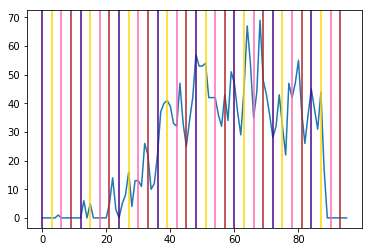

In [177]:
import matplotlib
from itertools import cycle

pairs = matplotlib.colors.cnames.items()[:4]
four_colors = [c for _, c in pairs]
names = [n for n, _ in pairs]

plt.plot(np.arange(len(counts_in_months)), counts_in_months)
for quarter, color in zip(xrange(0, len(counts_in_months), 3), cycle(four_colors)):
    plt.axvline(x=quarter, color=color)

for i, name in enumerate(names):
    print "Q{}: {}".format(i, name)

My overall conclusion about this dataset is that it would be pretty bad to make an estimate about how many homelessness situations there were between any given point in time. There might be missing data for certain calendar dates.